In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  (accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, classification_report)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [35]:
df= pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [36]:
pip install kagglehub

In [37]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)

# Assuming the CSV file is directly in the downloaded path
csv_file_path = os.path.join(path, 'cardio_train.csv')
print("Full path to cardio_train.csv:", csv_file_path)

Using Colab cache for faster access to the 'cardiovascular-disease-dataset' dataset.
Path to dataset files: /kaggle/input/cardiovascular-disease-dataset
Full path to cardio_train.csv: /kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


In [38]:
df= pd.read_csv(csv_file_path, sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [39]:
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [40]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


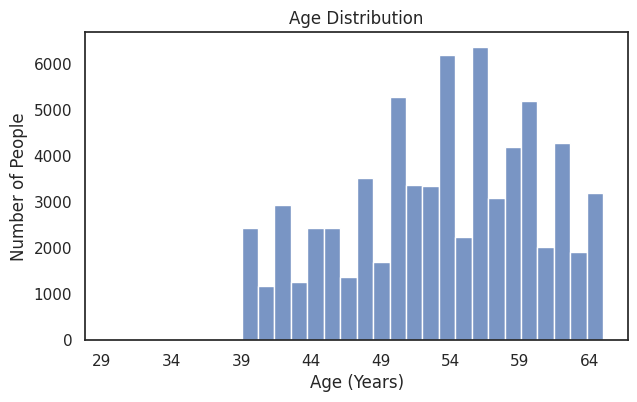

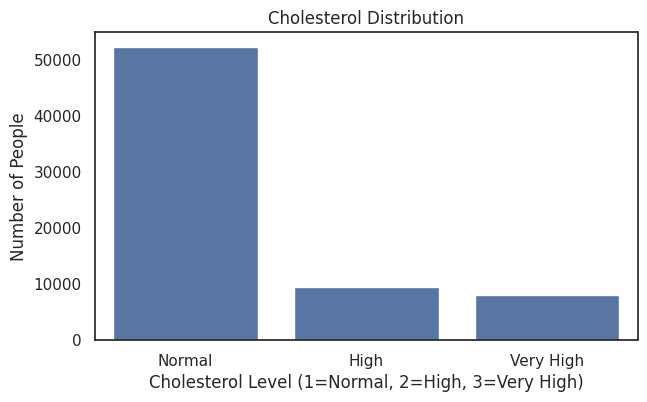

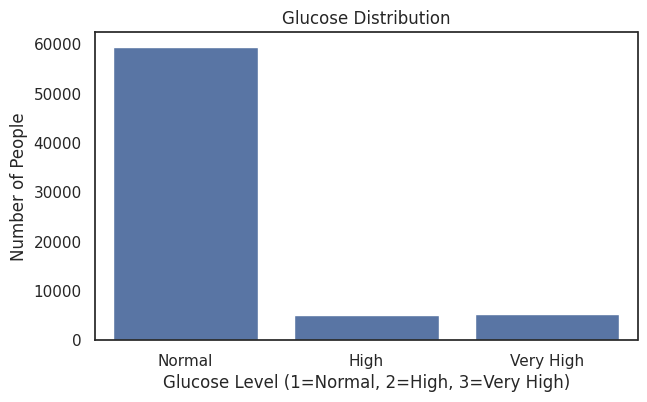

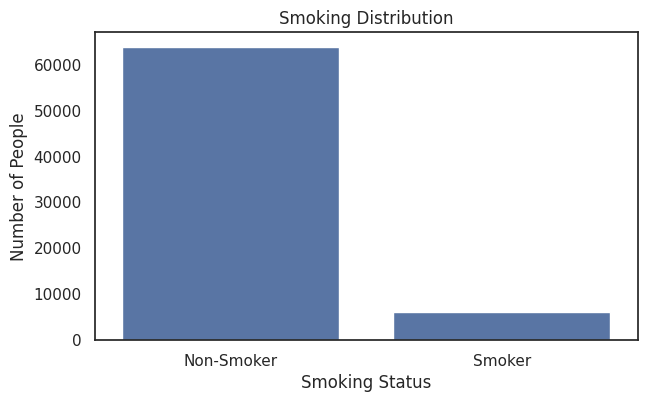

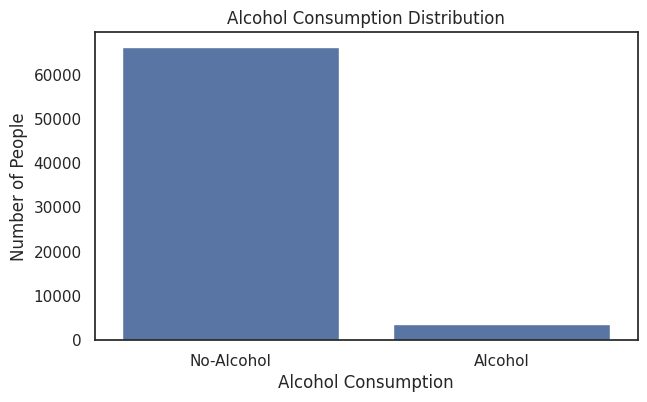

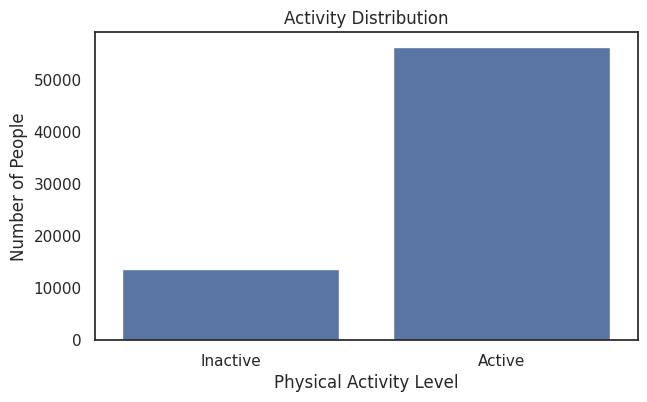

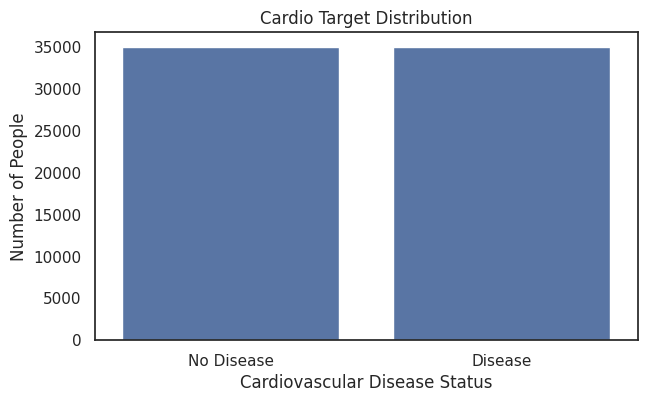

In [41]:

df['age_years'] = df['age'] / 365
sns.set(style="white")

plt.figure(figsize=(7,4))
sns.histplot(df['age_years'], bins=30, kde=False)
plt.xlabel("Age (Years)")
plt.ylabel("Number of People")
plt.title("Age Distribution")
plt.xticks(np.arange(int(df['age_years'].min()), int(df['age_years'].max())+1, 5))
plt.show()

#Cholesterol Distribution
plt.figure(figsize=(7,4))
sns.countplot(x='cholesterol', data=df)
plt.xlabel("Cholesterol Level (1=Normal, 2=High, 3=Very High)")
plt.ylabel("Number of People")
plt.title("Cholesterol Distribution")
plt.xticks([0,1,2], ["Normal", "High", "Very High"])
plt.show()

# Plot glucose level distribution
plt.figure(figsize=(7,4))
sns.countplot(x='gluc', data=df)
plt.xlabel("Glucose Level (1=Normal, 2=High, 3=Very High)")
plt.ylabel("Number of People")
plt.title("Glucose Distribution")
plt.xticks([0,1,2], ["Normal", "High", "Very High"])
plt.show()

# Plot smoking habits of people
plt.figure(figsize=(7,4))
sns.countplot(x='smoke', data=df)
plt.xlabel("Smoking Status")
plt.ylabel("Number of People")
plt.title("Smoking Distribution")
plt.xticks([0,1], ["Non-Smoker", "Smoker"])
plt.show()

# Plot alcohol consumption
plt.figure(figsize=(7,4))
sns.countplot(x='alco', data=df)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Number of People")
plt.title("Alcohol Consumption Distribution")
plt.xticks([0,1], ["No-Alcohol", "Alcohol"])
plt.show()

# Plot physical activity levels
plt.figure(figsize=(7,4))
sns.countplot(x='active', data=df)
plt.xlabel("Physical Activity Level")
plt.ylabel("Number of People")
plt.title("Activity Distribution")
plt.xticks([0,1], ["Inactive", "Active"])
plt.show()

# Plot number of people with and without heart disease
plt.figure(figsize=(7,4))
sns.countplot(x='cardio', data=df)
plt.xlabel("Cardiovascular Disease Status")
plt.ylabel("Number of People")
plt.title("Cardio Target Distribution")
plt.xticks([0,1], ["No Disease", "Disease"])
plt.show()


Count of ACTIVE feature = 1 : 56261
Count of SMOKE  feature= 1  : 6169
Count of ALCO feature= 1   : 3764


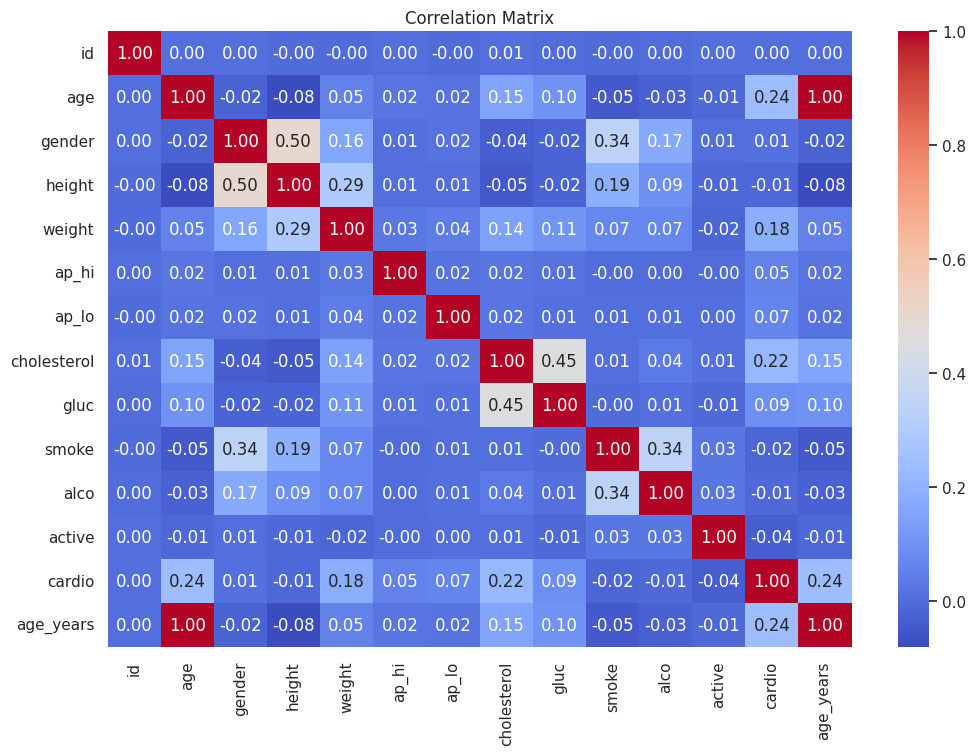

In [42]:
# categorial_features = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
# for feature in categorial_features:
#     plt.figure()
#     sns.countplot(x=feature, hue='cardio', data=df)
#     plt.title(f"{feature.capitalize()} vs Number of People")
#     plt.show()

print("Count of ACTIVE feature = 1 :", df[df['active'] == 1].shape[0])
print("Count of SMOKE  feature= 1  :", df[df['smoke'] == 1].shape[0])
print("Count of ALCO feature= 1   :", df[df['alco'] == 1].shape[0])


# correlation_matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [43]:
#confusion matrix function
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

Model Comparison:
Random Forest - Accuracy: 0.7143, ROC_AUC: 0.7143, Precision: 0.7196, Recall: 0.7038, F1 Score: 0.7116


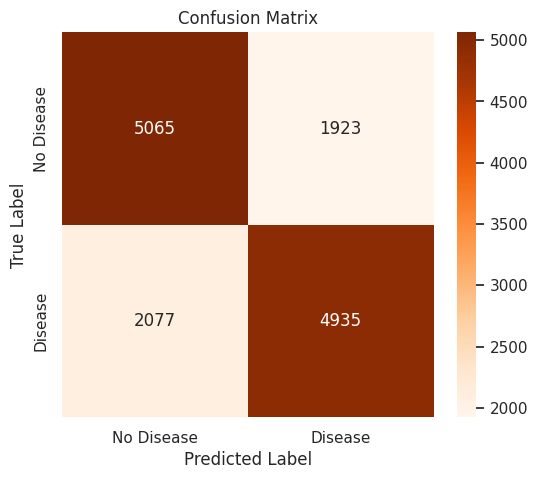

Decision Tree - Accuracy: 0.6284, ROC_AUC: 0.6284, Precision: 0.6272, Recall: 0.6362, F1 Score: 0.6317


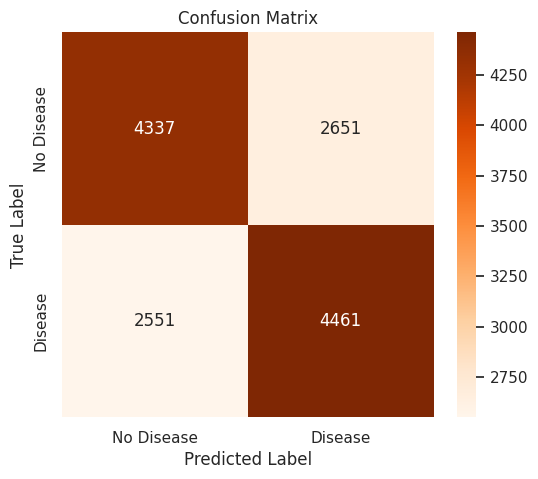

Logistic Regression - Accuracy: 0.7236, ROC_AUC: 0.7236, Precision: 0.7457, Recall: 0.6800, F1 Score: 0.7113


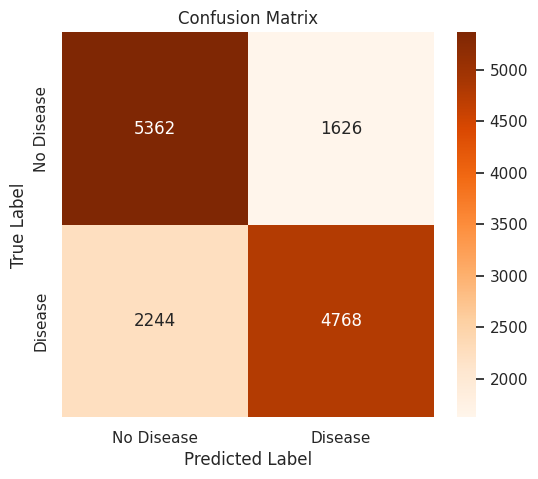

K-Nearest Neighbors - Accuracy: 0.6499, ROC_AUC: 0.6500, Precision: 0.6549, Recall: 0.6365, F1 Score: 0.6455


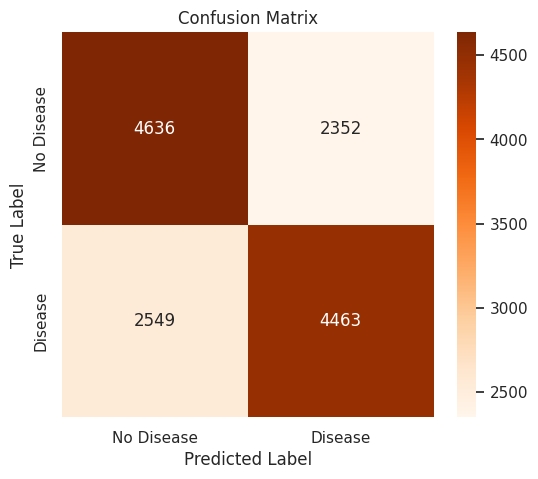

In [44]:

# Preprocessing
X = df.drop(['id', 'cardio', 'age'], axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = {}
print("Model Comparison:")
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    roc = roc_auc_score(y_test, preds)
    pre = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results[name] = {"Accuracy": acc, "ROC_AUC": roc, "Precision": pre, "Recall": rec, "F1 Score": f1}
    print(f"{name} - Accuracy: {acc:.4f}, ROC_AUC: {roc:.4f}, Precision: {pre:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    plot_confusion_matrix(y_test, preds, classes=['No Disease', 'Disease'])



In [ ]:

from sklearn.model_selection import GridSearchCV
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 5],
        "solver": ["lbfgs", "liblinear"]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5]
    },

    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 11],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }
}

results = {}

for name, model in classifiers.items():

    print(f"\nTUNING: {name}")
    params = param_grids[name]

    # -----------------------------
    # Hyperparameter Tuning
    # -----------------------------
    if params:
        tuner = GridSearchCV(
            estimator=model,
            param_grid=params,
            scoring="f1",
            cv=3,
            n_jobs=-1
        )
        tuner.fit(X_train, y_train)
        best_model = tuner.best_estimator_
        print("Best Params:", tuner.best_params_)
    else:
        best_model = model
        best_model.fit(X_train, y_train)
        print("No tuning for Naive Bayes")

    # -----------------------------
    # Predictions
    # -----------------------------
    preds = best_model.predict(X_test)

    # probability for ROC curve
    if hasattr(best_model, "predict_proba"):
        prob = best_model.predict_proba(X_test)[:, 1]
    else:
        prob = preds  # fallback

    # -----------------------------
    # METRICS
    # -----------------------------
    acc = accuracy_score(y_test, preds)
    pre = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc = roc_auc_score(y_test, prob)

    results[name] = [acc, pre, rec, f1, roc]

    # -----------------------------
    # CONFUSION MATRIX
    # -----------------------------
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # -----------------------------
    # ROC CURVE
    # -----------------------------
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # -----------------------------
    # PRINT METRICS
    # -----------------------------
    print(f"RESULTS for {name}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {pre:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print("-" * 50)

# ============================
# BEST MODEL
# ============================

cols = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
final_df = pd.DataFrame(results, index=cols).T
final_sorted = final_df.sort_values("F1 Score", ascending=False)

print("\n\nBEST MODEL BASED ON F1 SCORE:")
print(final_sorted.head(1))

final_sorted




TUNING: Random Forest


In [33]:
# 1. Select and Train the Best Model
best_model_name = final_sorted.head(1).index[0]
print("BEST MODEL SELECTED:", best_model_name)

params = param_grids[best_model_name]
base_model = classifiers[best_model_name]

if params:
    # Re-train to ensure we have the best version active
    tuner = GridSearchCV(estimator=base_model, param_grid=params, scoring="f1", cv=3, n_jobs=-1)
    tuner.fit(X_train, y_train)
    best_model = tuner.best_estimator_
else:
    base_model.fit(X_train, y_train)
    best_model = base_model

print(f"\nModel Ready: {best_model}")

# 2. Get User Input
print("\n===== ENTER USER INPUT DATA =====")
try:
    age_years   = float(input("Age (years): "))
    gender      = int(input("Gender (1=Female, 2=Male): "))
    height      = float(input("Height (cm): "))
    weight      = float(input("Weight (kg): "))
    ap_hi       = float(input("Systolic BP (ap_hi): "))
    ap_lo       = float(input("Diastolic BP (ap_lo): "))
    cholesterol = int(input("Cholesterol (1: Norm, 2: High, 3: V.High): "))
    gluc        = int(input("Glucose (1: Norm, 2: High, 3: V.High): "))
    smoke       = int(input("Smoking (0/1): "))
    alco        = int(input("Alcohol (0/1): "))
    active      = int(input("Active (0/1): "))

    # --- CRITICAL FIX: FEATURE ORDERING ---
    # In your dataframe, 'age_years' was created last, so it is the LAST column in X.
    # We must construct the array in this specific order:
    # [gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, age_years]

    user_input = np.array([[gender, height, weight, ap_hi, ap_lo,
                            cholesterol, gluc, smoke, alco, active, age_years]])

    # 3. Scale the Input
    # We must use the SAME scaler fitted on the training data
    user_input_scaled = scaler.transform(user_input)

    # 4. Predict
    prediction = best_model.predict(user_input_scaled)[0]
    probability = best_model.predict_proba(user_input_scaled)[0]

    print("\n------------------------------------------------")
    print(f"Probability of Disease: {probability[1]:.2%}")

    if prediction == 1:
        print("Result: HIGH Chance of Cardiovascular Disease")
    else:
        print("Result: LOW Chance of Cardiovascular Disease")
    print("------------------------------------------------")

except ValueError:
    print("\nError: Please enter valid numeric values.")

BEST MODEL SELECTED: Random Forest

Model Ready: RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

===== ENTER USER INPUT DATA =====
Age (years): 56
Gender (1=Female, 2=Male): 1
Height (cm): 160
Weight (kg): 70
Systolic BP (ap_hi): 120
Diastolic BP (ap_lo): 70
Cholesterol (1: Norm, 2: High, 3: V.High): 2
Glucose (1: Norm, 2: High, 3: V.High): 1
Smoking (0/1): 0
Alcohol (0/1): 0
Active (0/1): 1

------------------------------------------------
Probability of Disease: 37.30%
Result: LOW Chance of Cardiovascular Disease
------------------------------------------------
